In [1]:
import numpy as np
import matplotlib.pyplot as plt

import constants as const

plt.style.use('science')
gr = 4/3
h = 3

In [2]:
spectra_lo = np.loadtxt('spectra_local_lo_a0_fix_hpp_n_14.txt')
spectra_nlo = np.loadtxt('spectra_local_nlo_a0_B6_fix_coord_hp_n_14_coord_ir_corrected.txt')
spectra_nlo[:, 1:] *= -1
spectra_mm = np.loadtxt('spectrum_Mott_Massey_hp_coord.txt')

In [3]:
spectra_lo[-1]

array([ 4.15164025e-01, -2.40941171e-01, -1.29842910e-01, -6.28732547e-02,
       -2.60435556e-02, -8.42404202e-03, -1.73690985e-03, -1.19178460e-04])

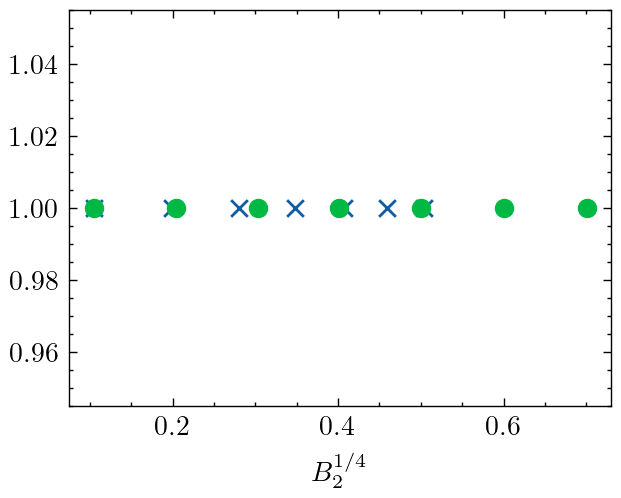

In [4]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter((-spectra_mm)**(1/4), np.ones(spectra_mm.size), marker='x')
ax.scatter((-spectra_lo[-1, 1:])**(1/4), np.ones(spectra_lo[-1, 1:].size))

ax.set_xlabel(r'$B_2^{1/4}$');

In [5]:
lo = np.array([
    -0.3363476038207006,
    -0.16469391324961233,
    -0.07325627850557208,
    -0.028359352045461497,
    -0.00875453184906221,
    -0.0017582310298918326,
    -0.00011939467350265412
])
gamma = np.sqrt(2*const.MU*-lo)

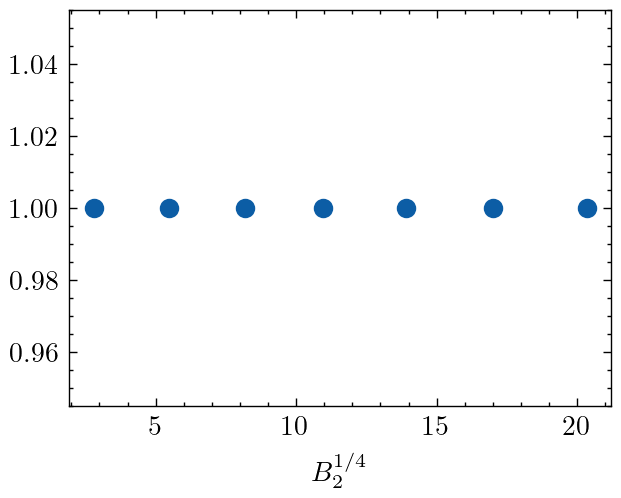

In [6]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

# ax.scatter((-spectra_mm)**(1/4), np.ones(spectra_mm.size), marker='x')
ax.scatter((const.BETA4*gamma)**(1/2), np.ones(spectra_lo[-1, 1:].size))

ax.set_xlabel(r'$B_2^{1/4}$');

In [7]:
# x = (-spectra_lo[-1, 1:])**(1/4)
x = (const.BETA4*gamma)**(1/2)

In [8]:
x[1:] - x[:-1]

array([-3.32518495, -3.11930394, -2.93463237, -2.79049525, -2.70049798,
       -2.67716081])

In [9]:
const.BETA4

32.70989286766126

In [10]:
spectra_mm

array([-0.06476102, -0.04422778, -0.02740751, -0.01466227, -0.00611664,
       -0.00156342, -0.00012025])

In [11]:
l_mm = np.sqrt(1/(2*const.MU * -spectra_mm))

In [12]:
def plot_range(low, high, spectra, ax, color, linestyle, label):
    ii = np.intersect1d(
        np.where(const.BETA4/spectra[:, 0] >= low),
        np.where(const.BETA4/spectra[:, 0] <= high)
    )
    for i in range(4, 8):
        ax.plot(l_mm[i-1]/spectra[ii, 0], -spectra[ii, i]/-spectra_mm[i-1],
                color=color, linestyle=linestyle, label=label)
        label = None

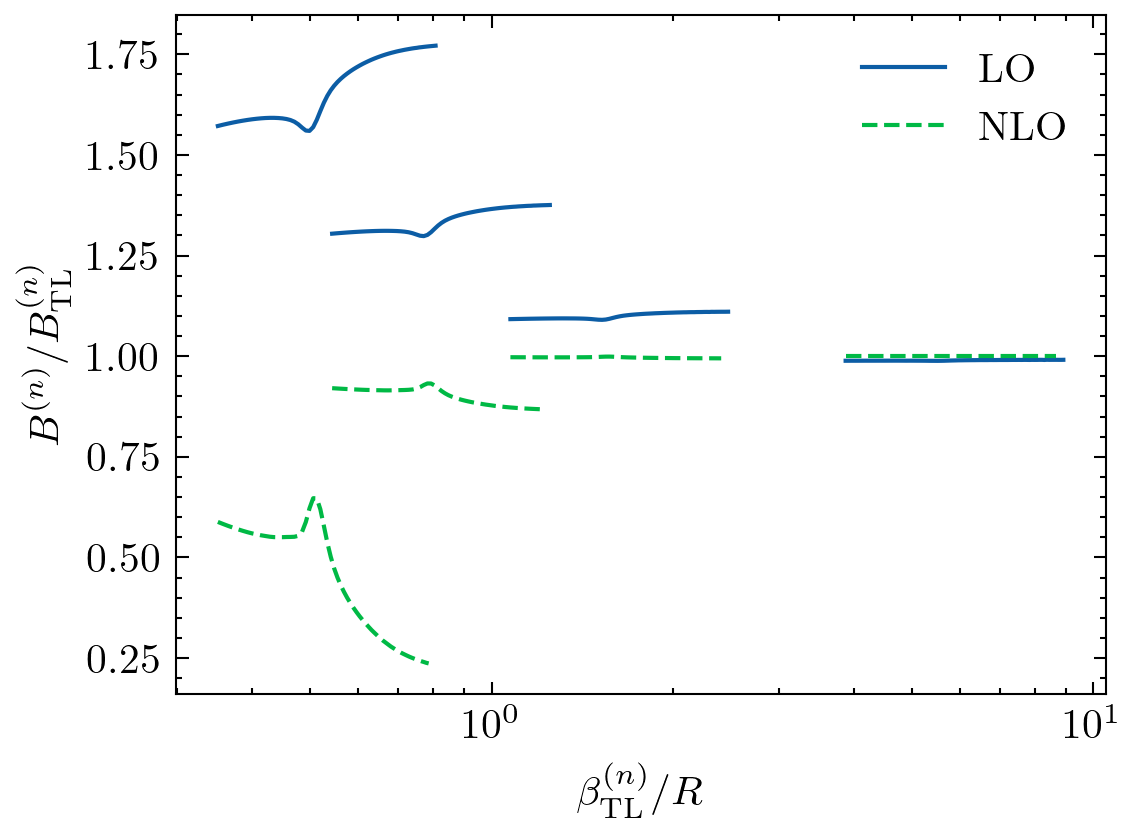

In [27]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')

plot_range(30, 70, spectra_lo, ax, 'C0', '-', 'LO')
plot_range(30, 70, spectra_nlo, ax, 'C1', '--', 'NLO')

# for e in spectra_mm[3:]:
#     ax.axhline(-e, linestyle='-.', color='C6')

# ax.annotate(r'$n=6$', [4, 1.1], xycoords='data')
# ax.annotate(r'$n=5$', [1.6, 1.1], xycoords='data')
# ax.annotate(r'$n=4$', [0.55, 1.1], xycoords='data')
# ax.annotate(r'$n=3$', [0.35, 1.1], xycoords='data')

ax.legend()
ax.set_xscale('log')
ax.set_xlabel(r'$\beta^{(n)}_{{\rm TL}}/R$')
ax.set_ylabel(r'$B^{(n)}/B^{(n)}_{{\rm TL}}$');

plt.savefig('figures/lo_nlo_spectrum_R.pdf')

In [28]:
rgf7 = np.loadtxt('rgflow_local_lo_a0_fix_hp.txt')
rgf14 = np.loadtxt('rgflow_local_lo_a0_fix_hp_n_14_coord_ir_corrected.txt')

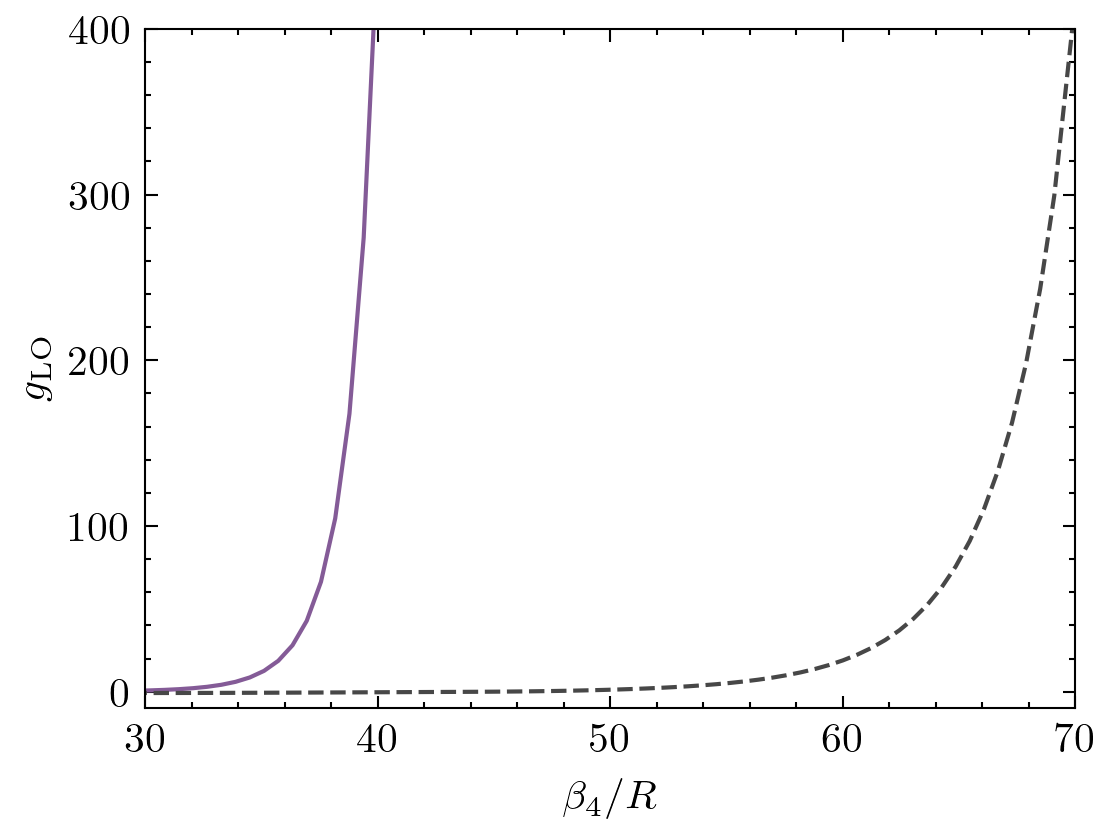

In [46]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')

ax.plot(const.BETA4/rgf7[:, 0], rgf7[:, 1], color='C4')
ax.plot(const.BETA4/rgf14[:, 0], rgf14[:, 1], color='C5', linestyle='--')

ax.set_ylabel(r'$g_{\rm LO}$')
ax.set_xlabel(r'$\beta_4/R$')
ax.set_xlim([30, 70])
ax.set_ylim([-10, 400]);

plt.savefig('figures/rgflows.pdf')